In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize,curve_fit
from scipy import asarray as ar,exp 
from scipy import optimize



1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [42]:
def f(x,y):
    return (4-(2.1*x**2)+(x**4/3))*(x**2)+(x*y)+((4*y**2)-4)*(y**2)

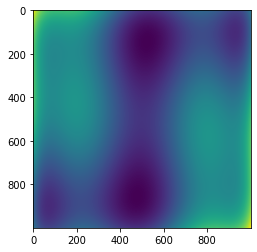

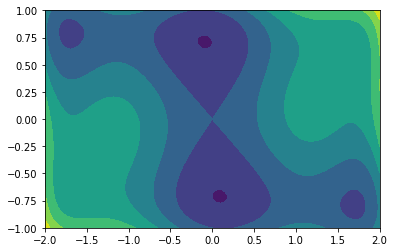

In [43]:
x = np.linspace(-2,2,1000)
y= np.linspace(-1,1,1000)

xx, yy = np.meshgrid(x, y)
z = f(xx,yy)

plt.imshow(z)
plt.figure()
plt.contourf(x, y, z)

The 2 global minima are for **(x=-0.1, y=0.75)**  and **(x=0.1, y=-0.75)**


In [44]:
def fprime(x):
    y=x[1]
    x= x[0]
    return (4-2.1*x**2 + ((x**4)/3))*x**2 + x*y + (4*y**2 - 4)*y**2


Global minima for **(-0.1,0.75)**

In [45]:
minima =minimize(fprime,[-0.1,0.75]) 
print("The minimum result for global minima: (-0.1,0.75) = ",minima.x)
print("f(",minima.x,") = ",fprime(minima.x))

The minimum result for global minima: (-0.1,0.75) =  [-0.08984202  0.71265639]
f( [-0.08984202  0.71265639] ) =  -1.0316284534898765


Global minima for **(0,0)**

In [46]:
minima =minimize(fprime,[0.0,0.0]) 
print("The minimum result for global minima: (0,0) = ",minima.x)
print("f(",minima.x,") = ",fprime(minima.x))

The minimum result for global minima: (0,0) =  [0. 0.]
f( [0. 0.] ) =  0.0


Global minima for **(0.1,-0.75)**

In [47]:
minima =minimize(fprime,[0.1,-0.75]) 
print("The minimum result for global minima: (0.1,-0.75) = ",minima.x)
print("f(",minima.x,") = ",fprime(minima.x))

The minimum result for global minima: (0.1,-0.75) =  [ 0.08984201 -0.71265641]
f( [ 0.08984201 -0.71265641] ) =  -1.0316284534898768


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [48]:
maxTemp = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
minTemp = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]


1-Plot the temperatures

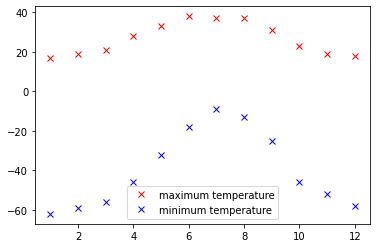

In [49]:
months = np.linspace(1, 12, 12)
plt.plot(months, maxTemp,'rx', label='maximum temperature')
plt.plot(months, minTemp,'bx', label='minimum temperature')
plt.legend()

2-Find a suitable a function that can describe min and max temperatures

Let's define a gaussian function

In [50]:
def Gauss(x,a, m, std):
    return a*np.exp(-(x-m)**2/(2*std**2))

3.Fit this function to the data with scipy.optimize.curve_fit()

In [51]:
# find the best parameters of the gaussian for the max values
mean = sum(months*maxTemp)/12    
sigma = sum(maxTemp*(months-mean)**2)/12 
params_max, params_covariance_max = optimize.curve_fit(Gauss, months, maxTemp, p0=[1,mean, sigma])
print(params_max)

[ 2.67499871e+01 -8.27094992e+10  1.56135373e+14]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [52]:
# find the best parameters of the gaussian for the min values
mean = sum(months*minTemp)/12    
sigma = sum(minTemp*(months-mean)**2)/12 

params_min, params_covariance_min = optimize.curve_fit(Gauss, months, minTemp, p0=[1,mean, sigma])
print(params_min)

[-3.96666658e+01 -3.45715292e+11 -9.37002701e+15]


4.Plot the result. Is the fit reasonable? If not, why?

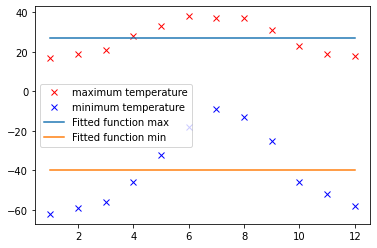

In [53]:
# display the dataset of temperatures
plt.plot(months, maxTemp,'rx', label='maximum temperature')
plt.plot(months, minTemp,'bx', label='minimum temperature')

# display the function founded
plt.plot(months, Gauss(months, params_max[0], params_max[1],params_max[2]),label='Fitted function max')
plt.plot(months, Gauss(months, params_min[0], params_min[1],params_min[2]),label='Fitted function min')


plt.legend(loc='best')

The outcome is unsatisfactory; perhaps we got this output because this function has a loss average of zero (without absolute value of loss)

Is the time offset for min and max temperatures the same within the fit accuracy?
The temperature difference between the minimum and maximum is the same.

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [54]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/


--2022-01-17 15:47:37--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-01-17 15:47:37--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd5c00f749dd267763c0d843938.dl.dropboxusercontent.com/cd/0/inline/Bd8IUvAB7cF5-K1AjVRRrT5tuJvtjE_sgc9k8jRwyvZH4UoJQvYHZN3vgZ5fA7ZgJWbJ-Nv60JRtzOerbtHLjezCwE4lhY1eAszNwhDJWy-u8hCtluX39ZP7MKD1jenMcfF3cdcKLJHMFhGdLFYggw0w/file# [following]
--2022-01-17 15:47:37--  https://ucd5c00f749dd267763c0d843938.dl.dropboxusercontent.com/cd/0/inline/Bd8IUvAB7cF5-K1AjVRRrT5tuJvtjE_sgc9k8jRwyvZH4UoJQvYHZN3vgZ5fA7ZgJWbJ-Nv60JR

In [55]:
import pandas as pd
import scipy
from scipy import stats,optimize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Import data from file**

In [56]:
df = pd.read_pickle('data/residuals_261.pkl')
df = pd.DataFrame(df.item())
df.head()

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


In [57]:
residuals = df['residuals'].to_numpy()
distances = df['distances'].to_numpy()

**plot the data and determin the function**

In [58]:
def gauss(x,a, y, s,r): 
    return a*np.exp(-(x-y)**2/(2*s**2)) + r

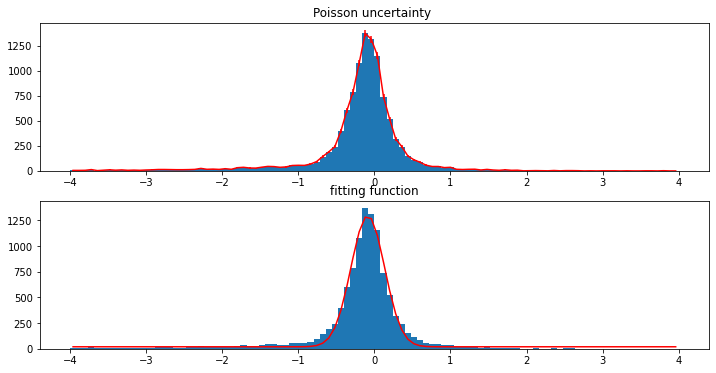

In [59]:
fig,(ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (12,6))
b = 100 
h,bins,_ = ax1.hist(df['residuals'], bins = b, range = (-4,4))
bin_centres = (bins[:-1] + bins[1:])/2. 

sigma_y = np.sqrt(np.abs(h)) 

ax1.set_title("Poisson uncertainty ")
ax1.errorbar(x = bin_centres, y = h, yerr = sigma_y, color = 'red')
xmin,xmax = plt.xlim()

mu, std = stats.norm.fit(residuals) #
popt,pcov = optimize.curve_fit(gauss,bin_centres, h, p0 = [ max(residuals),mu,std,0]) 

ax2.set_title("fitting function")
ax2.hist(residuals,bins = b, range = (-4,4))
ax2.plot(bin_centres, gauss(bin_centres, *popt), color ='red')


**Goodness-of-fit test**

In [61]:
opt_val = tuple(popt)
g_fit = gauss(bin_centres, *popt)
ndof = len(bin_centres) - 1 #degrees of freedom
cov = np.cov(bin_centres, h, ddof=2)
b_hat = cov[0,1] / cov[0,0]
a_hat = np.mean(h - b_hat*bin_centres)
chi2 = np.sum(((h - g_fit)**2) / std**2)
print("chi2 =", chi2)

chi2 = 5657.117942094404


In [62]:
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue)

p-value = 0.0


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [63]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt


--2022-01-17 15:48:25--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2022-01-17 15:48:25--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbe636d372f66dcce065f137c1b.dl.dropboxusercontent.com/cd/0/inline/Bd85gYTfqI0DFlq0dChXTUYPSFFgWvqx94Kew9yCHvpk0QuUumiR3Sa1fBTFCV5upPAblikUgMjsCdF5kgkNprsuYsLWj6ZJAjPwKLycmevlRDCGj4q3hW3kQbBjOZP5TQ9mHMM3SH22uuTV4QSFbqAb/file# [following]
--2022-01-17 15:48:25--  https://ucbe636d372f66dcce065f137c1b.dl.dropboxusercontent.com/cd/

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import f


function definition

In [65]:
def f(t,a,b,c): 
    return a * math.cos(2*np.pi*t + b) + c

In [66]:
data = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep=" ", header=None)
data.columns = ["Year", "Temperature"]


In [67]:
df = data[(data['Year'] > 2008) & (data['Year'] < 2012)].reset_index() #extracting desired columns in new dataframe
df = df.drop(df[df['Temperature'] == 99.].index).reset_index() #clearing data from bad samples


In [68]:
year = df['Year'].to_numpy()
temp = df['Temperature'].to_numpy()
mean_temp = np.mean(temp)
print("The mean temperature in Munich is ",mean_temp)

The mean temperature in Munich is  9.261252084167237


In [69]:
a,b,c = -11,6,7
y1 = [f(year[i],a,b,c) for i in range(len(year))]
y1

[-3.613219738163245,
 -3.6614207681150024,
 -3.7063033347640815,
 -3.7481829376387257,
 -3.7868769849446426,
 -3.8223740085108773,
 -3.854551486568143,
 -3.8836356089249104,
 -3.9094940301354306,
 -3.93211908626113,
 -3.951504071663914,
 -3.9675902464171635,
 -3.9804906873942976,
 -3.9901367212357837,
 -3.9965254890398985,
 -3.999655097299577,
 -3.9995310222571394,
 -3.9961523917338724,
 -3.989514712245091,
 -3.9796199510704664,
 -3.9665249416874406,
 -3.9501376334453493,
 -3.930504914132179,
 -3.907632602505771,
 -3.881527477486065,
 -3.8523101741247032,
 -3.819775311011467,
 -3.784033673710045,
 -3.745095855375567,
 -3.7029733964290372,
 -3.6578498414816654,
 -3.6094079970051354,
 -3.557821727199352,
 -3.5031063212417326,
 -3.445494687331193,
 -3.38458184766297,
 -3.3205912168315113,
 -3.253541760420699,
 -3.183453350611856,
 -3.1106190342276054,
 -3.0345268264651732,
 -2.955460577129225,
 -2.8734437199319895,
 -2.7885005631337805,
 -2.700982125263204,
 -2.6102732002956923,
 -2.51671

In [70]:
avg = df.nlargest(12, 'Temperature')
avg = avg[avg['Temperature'] != 99.]
hot = np.mean(avg['Temperature'].to_numpy())
print("hot days avg temperature: ", hot)


hot days avg temperature:  24.907408333333336


In [71]:
avg = df.nsmallest(10, 'Temperature')
cold = np.mean(avg['Temperature'].to_numpy())
print("cold days avg temperature: ", cold)


cold days avg temperature:  -9.777784


**Plot**

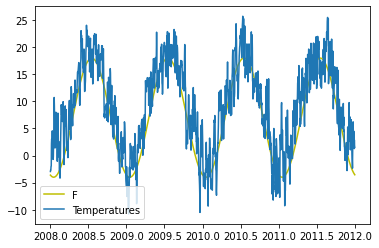

In [72]:
plt.plot(year, y1,'y', label = "F")
plt.plot(year, df['Temperature'], label = "Temperatures")
plt.legend()
plt.show()



In [73]:
print("The phase of the cosine function is determined by the parameter b, which aids in appropriately determining the function's beginning point based on temperature data.")


The phase of the cosine function is determined by the parameter b, which aids in appropriately determining the function's beginning point based on temperature data.


In [74]:
def g(t,a,b,c,d):
    return a * math.cos(2*np.pi*b*t + c) + d

In [75]:
a,b,c,d = -11,1.02,4.8,7
y2 = [g(year[i],a,b,c,d) for i in range(len(year))]


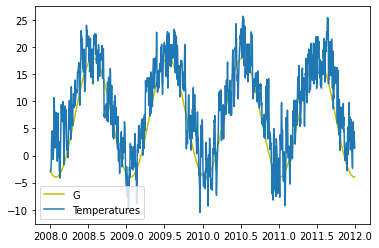

In [76]:

plt.plot(year, y2,'y', label = "G")
plt.plot(year, df['Temperature'], label = "Temperatures")
plt.legend()
plt.show()

RSS of the functions

In [80]:
fSSR = 0
gSSR = 0

for i in range(len(year)-1):
    fSSR = fSSR + (temp[i] - y1[i])**2
    gSSR = gSSR + (temp[i] - y2[i])**2

print("The SSR of f is ", fSSR)
print("The SSR of the g is ", gSSR)

The SSR of f is  27090.211957467698
The SSR of the g is  29893.488872360293


Fisher f-test

In [83]:
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=True):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

f_vs_g = Ftest(fSSR, gSSR, 3,4, len(year))

CL: 1.000 , additional parameter necessary: NO
